# ACADEMY


En vue d'un projet d'expansion à l'international, faisons une analyse exploratoire afin de pouvoir répondre aux questions suivantes :
- Quels sont les pays avec un fort potentiel de clients pour les services ?
- Pour chacun de ces pays quelle sera l'évolution de ce potentiels de clients ?
- Dans quels pays l'entreprise doit elle opérer en priorité ?

Nous disposons pour cette étude des données de la Banque mondiale [Lien](https://datacatalog.worldbank.org/dataset/education-statistics)  

Pour avoir des répondre aux questions posées, nous avons besoin d'explorer ce que l'on sait et ce que qui est prévu dans l'avenir dans cette base de données.

Nous allons donc commencer par regarder le contenu de la base de données

# Etude de Edstats

Importation des librairies utiles pour l'étude

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Recuperation des donnees sous forme de dataframe  


In [7]:
df=pd.read_csv("C:/Users/leila/openclassrooms/projet2/Edstats_csv/EdStatsData.csv")
dfc=pd.read_csv("C:/Users/leila/openclassrooms/projet2/Edstats_csv/EdStatsCountry.csv")
print("dimension du fichier EdsStatsData : {}, dimension du fichier EdStatsCountry : {}".format(df.shape,dfc.shape))

dimension du fichier EdsStatsData : (886930, 70), dimension du fichier EdStatsCountry : (241, 32)


Quel est le contenu des jeux de donnees ?

In [8]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Nous pouvons constater que df contient de nombreuses valeurs manquantes.

In [9]:
dfc.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


Il en est de meme pour dfc

### Traitement du dataframe dfc

En vue de l'etude demandee, choix de ne retenir que les codes des pays, leur nom, leur region et le groupe de revenus

In [10]:
dfcs=dfc.loc[:,['Country Code','Short Name', 'Region', 'Income Group']]
dfcs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  241 non-null    object
 1   Short Name    241 non-null    object
 2   Region        214 non-null    object
 3   Income Group  214 non-null    object
dtypes: object(4)
memory usage: 7.7+ KB


On constate que toutes les valeurs sont renseignees pour le code et le nom des pays.  
27 non reponses concernant la region et le niveau de revenus  

Suppression des lignes pour lesquelles la region n'est pas renseignee

In [11]:
dfcs.drop(dfcs.index[dfcs['Region'].isnull()],0,inplace=True)
dfcs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 0 to 240
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  214 non-null    object
 1   Short Name    214 non-null    object
 2   Region        214 non-null    object
 3   Income Group  214 non-null    object
dtypes: object(4)
memory usage: 8.4+ KB


Il n'y a donc plus de valeurs manquantes

Changement du nom de la colonne 'Short Name' par 'Country' pour plus de comprehension


In [12]:
dfcs.rename(columns={'Short Name':'Country'},inplace=True)

On regarde quelles sont les regions et les groupes possibles de revenus

In [13]:
regions=dfcs['Region'].unique()
print(regions)
print(dfcs['Income Group'].unique())

['Latin America & Caribbean' 'South Asia' 'Sub-Saharan Africa'
 'Europe & Central Asia' 'Middle East & North Africa'
 'East Asia & Pacific' 'North America']
['High income: nonOECD' 'Low income' 'Upper middle income'
 'Lower middle income' 'High income: OECD']


Dans la colonne 'Income Group', on ne va pas faire de difference dans la methode de qualification de 'High income'

In [14]:
dfcs['Income Group']=dfcs['Income Group'].apply(lambda x: 'High income' if ('High income' in x)  else x)

Regardons le nombre de pays par region

In [15]:
dfcs['Region'].value_counts()

Europe & Central Asia         57
Sub-Saharan Africa            48
Latin America & Caribbean     41
East Asia & Pacific           36
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: Region, dtype: int64

Quels sont les pays dans la region North America ?

In [16]:
dfcs[dfcs['Region']=='North America']['Country']

25           Bermuda
33            Canada
227    United States
Name: Country, dtype: object

### Traitement du dataframe df


En ayant regarde le site de Worldbank concernant l'education [Lien](https://datatopics.worldbank.org/education/), on remarque :  
- certaines colonnes concernent le passe et d'autres le futur
- les indicateurs qui, a priori, nous interessent le plus

Decision de commencer par construire deux dataframe, l'un concernant le passe (df_past) et l'autre le futur (df_futur).  

Pour df_past, on choisit :  
- les annees pas trop eloignees et qui sont relativement remplies : 2013, 2014 et 2015
- les indicateurs concernant la taille de la population, le taux de croissance de la population, le pourcentage de la population utilisant le net

Pour df_futur :
- les annees 2025,2030 et 2035
- les indicateurs concernant la projection des 15-19 ans ayant un niveau d'etudes 2, 3 ou 4 


A priori, c'est cette pououlation des 15-19 ans qui est la plus concernee par des cours en ligne.

### Creation et traitement du dataframe df_past

Correspondance entre le nom des indicateurs dans df et dans df_past et leur signification  


|df|df-past|signification|
|:---:|:---:|:---:|
|SP.POP.TOTL|POP.TOTL|Population Totale|
|SP.POP.GROW|%.POP.GROWTH|Pourcentage de croissance de la population|
|IT.NET.USER.P2|%.INTERNET.USER|Pourcentage de la population utilisant INTERNET|


In [17]:
dftemp=df[['Country Code','Country Name','Indicator Code','2013','2014','2015']]
df_past=dftemp[dftemp['Indicator Code'].isin(['SP.POP.TOTL','SP.POP.GROW','IT.NET.USER.P2'])].copy()
df_past['Indicator Code']=df_past['Indicator Code'].apply(lambda x: 'POP.TOTL'
                                                          if x=='SP.POP.TOTL'  
                                                          else ('%.POP.GROWTH' if x=='SP.POP.GROW' else '%.INTERNET.USER' ))
df_past.head()

,Country Code,Country Name,Indicator Code,2013,2014,2015
1375,ARB,Arab World,%.INTERNET.USER,3.686860e+01,NaN,NaN
2307,ARB,Arab World,%.POP.GROWTH,2.012570e+00,NaN,NaN
2533,ARB,Arab World,POP.TOTL,3.697615e+08,NaN,NaN
5040,EAS,East Asia & Pacific,%.INTERNET.USER,4.457735e+01,46.812103,49.787924
5972,EAS,East Asia & Pacific,%.POP.GROWTH,6.764621e-01,0.681871,0.675463


Les premieres lignes ne concernent pas des pays mais des regions ou le groupe de revenus.

#### Comparaison sur l'evolution, entre 2013 et 2015, de la population et de l'usage d'Internet pour les revenus superieurs 

Nous allons nous interesser aux pays qui ont un niveau de revenus eleve puisque la start-up a une preoccupation business et non caritative.  

Representation de cette evolution en y incluant le monde en global

Text(0, 0.5, 'Pourcentage de Croissance de la population')

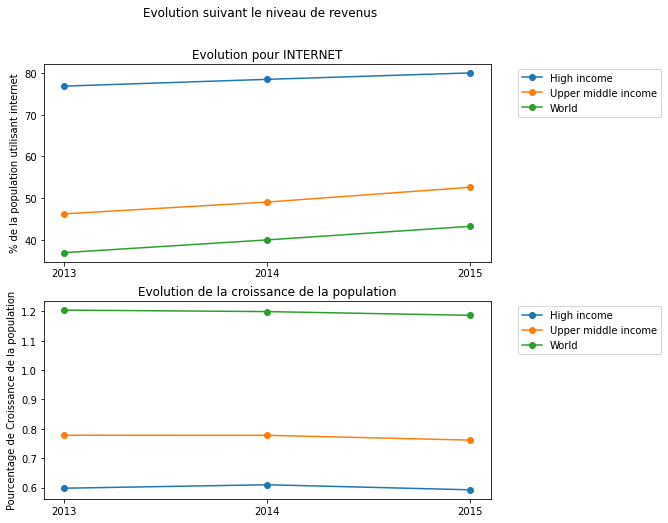

In [19]:
plt.figure(2,figsize=(8,8))
plt.suptitle('Evolution suivant le niveau de revenus')

plt.subplot(2,1,1)
df_NIC=df_past[((df_past['Country Code'].isin(['HIC','UMC','WLD']))&(df_past['Indicator Code']=='%.INTERNET.USER'))].copy()
grNIC=plt.plot(df_NIC[['2013','2014','2015']].T,marker='o')
plt.legend(grNIC,df_NIC['Country Name'],bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('Evolution pour INTERNET')
plt.ylabel('% de la population utilisant internet')

plt.subplot(2,1,2)
df_POP=df_past[((df_past['Country Code'].isin(['HIC','UMC','WLD']))&(df_past['Indicator Code']=='%.POP.GROWTH'))].copy()
grPOP=plt.plot(df_POP[['2013','2014','2015']].T,marker='o')
plt.legend(grPOP,df_POP['Country Name'],bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('Evolution de la croissance de la population')
plt.ylabel('Pourcentage de Croissance de la population')

Nous remarquons que les habitants des pays "riches" ont l'habitude d'utiliser internet (plus de 80 % de la population) dès 2015.
Ceci confirme d'opter pour s'interesser aux pays riches pour le projet d'expansion.

#### Comparaison de l'evolution de la population et de l'usage d'internet suivant les regions 

Evolution du taux d'utilisation d'internet par region

Text(0.5, 0.98, 'Evolution du Pourcentage de la population utilisant Internet')

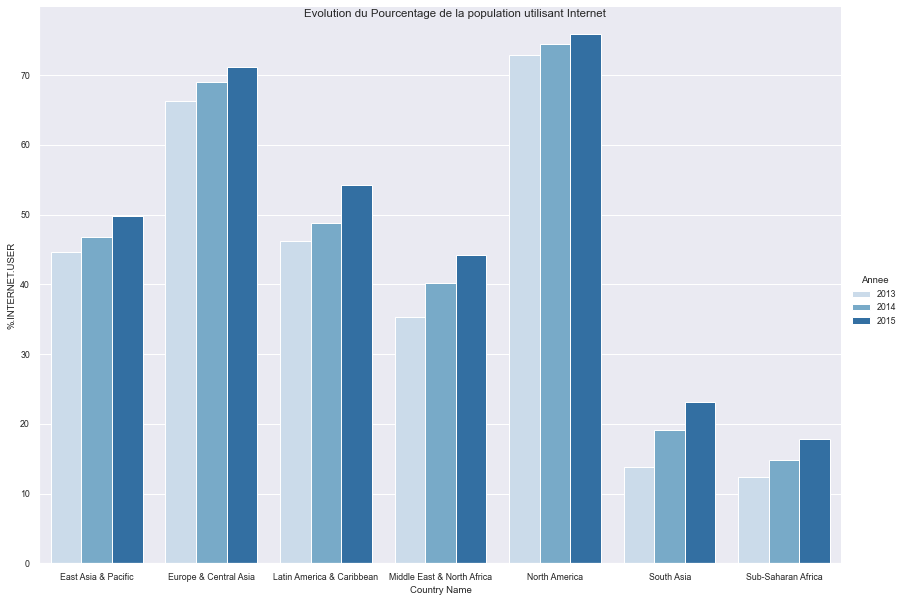

In [55]:
df_reg_net=df_past[((df_past['Country Name'].isin(regions))&(df_past['Indicator Code']=='%.INTERNET.USER'))].copy()
reg_net=df_reg_net[['Country Name','2013','2014','2015']].melt(id_vars=['Country Name'],value_vars=['2013','2014','2015'],
                                                              var_name='Annee',value_name='%.INTERNET.USER')
sns.set(font_scale=0.8)
ax=sns.catplot(x='Country Name',y='%.INTERNET.USER',hue='Annee',
               data=reg_net,kind='bar', height=8.27, aspect=11.7/8.27,palette='Blues')
ax.fig.suptitle('Evolution du Pourcentage de la population utilisant Internet')

Evolution du taux de croissance de la population par region

In [68]:
reg_net.head()

,Country Name,Annee,%.INTERNET.USER
0,East Asia & Pacific,2013,44.577349
1,Europe & Central Asia,2013,66.306669
2,Latin America & Caribbean,2013,46.261883
3,Middle East & North Africa,2013,35.249798
4,North America,2013,72.830288


Text(0.5, 0.98, 'Evolution du Pourcentage de Croissance de la Population')

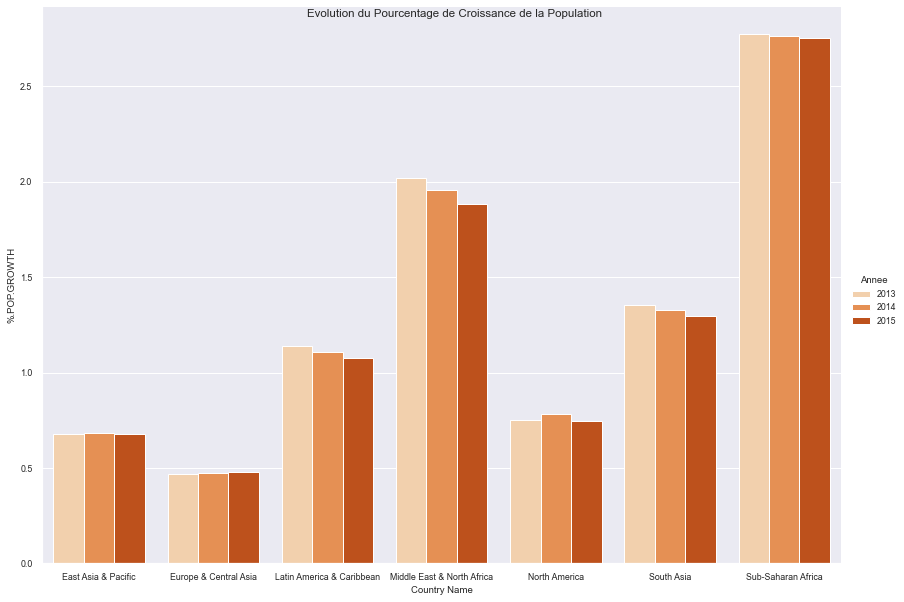

In [54]:
df_reg_pop=df_past[((df_past['Country Name'].isin(regions))&(df_past['Indicator Code']=='%.POP.GROWTH'))].copy()
reg_pop=df_reg_pop[['Country Name','2013','2014','2015']].melt(id_vars=['Country Name'],value_vars=['2013','2014','2015'],
                                                              var_name='Annee',value_name='%.POP.GROWTH')
sns.set(font_scale=0.8)
ax=sns.catplot(x='Country Name',y='%.POP.GROWTH',hue='Annee',
               data=reg_pop,kind='bar', height=8.27, aspect=11.7/8.27,palette='Oranges')
ax.fig.suptitle('Evolution du Pourcentage de Croissance de la Population')

Text(0.5, 0.98, 'Population Totale en milliards en 2015')

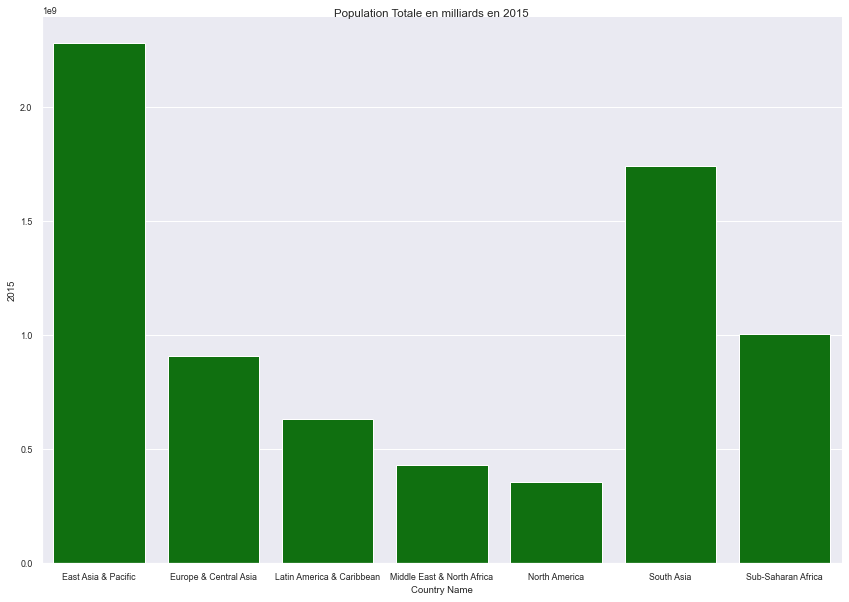

In [53]:
df_reg=df_past[((df_past['Country Name'].isin(regions))&(df_past['Indicator Code']=='POP.TOTL'))].copy()

sns.set(font_scale=0.8)
ax=sns.catplot(x='Country Name',y='2015',color='Green',
               data=df_reg,kind='bar', height=8.27, aspect=11.7/8.27)
ax.fig.suptitle('Population Totale en milliards en 2015')

Que conclure de ces graphiques ?  
- La region d'Amerique du Nord ne semble pas pertinente pour l'etude d'expansion parce que les cours en ligne y sont deja tres developpes et qu'il serait sans doute pretentieux et risque de vouloir rivaliser avec les plateformes qui travaillent avec les grandes universites americaines et canadiennes (voir Coursera, Edx, etc..)
- La region europe et Asie Centrale est seduisante, ayant une population nombreuse et dont le taux de croissance augmente légèrement, une utilisation d'internet ancree dans les moeurs et constituee de nombreux pays riches.

###  Creation et traitement du dataframe df_futur

Correspondance entre le nom des indicateurs dans df et dans df_futur et leur signification  


|df|df-futur|signification|
|:---:|:---:|:---:|
|PRJ.POP.1519.2.MF|POP.15-19ANS.NIV2|Estimation du nombre (en milliers) des 15-19 ans ayant un niveau 2 (collège)|
|PRJ.POP.1519.3.MF|POP.15-19ANS.NIV3|Estimation du nombre (en milliers) des 15-19 ans ayant un niveau 3 (lycée)|
|PRJ.POP.1519.4.MF|POP.15-19ANS.NIV4|Estimation du nombre (en milliers) des 15-19 ans ayant un niveau 4 (post-BAC)|

In [23]:
dftemp=df[['Country Code','Indicator Code','2025','2030','2035']]
df_futur=dftemp[dftemp['Indicator Code'].isin(['PRJ.POP.1519.2.MF','PRJ.POP.1519.3.MF','PRJ.POP.1519.4.MF'])].copy()

df_futur['Indicator Code']=df_futur['Indicator Code'].apply(
    lambda x: 'POP.15-19ANS.NIV2' if x=='PRJ.POP.1519.2.MF' else ('POP.15-19ANS.NIV3' 
                                                                  if x=='PRJ.POP.1519.3.MF' else 'POP.15-19ANS.NIV4'))

df_futur.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 726 entries, 3590 to 886867
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Code    726 non-null    object 
 1   Indicator Code  726 non-null    object 
 2   2025            501 non-null    float64
 3   2030            501 non-null    float64
 4   2035            501 non-null    float64
dtypes: float64(3), object(2)
memory usage: 34.0+ KB


Suppression des lignes contenant des valeurs non renseignees

In [24]:
df_futur.dropna(subset=['2025','2030','2035'],inplace=True)
df_futur.head()

,Country Code,Indicator Code,2025,2030,2035
91550,WLD,POP.15-19ANS.NIV2,230598.70,228785.94,229178.84
91556,WLD,POP.15-19ANS.NIV4,11431.60,12075.71,12729.74
91562,WLD,POP.15-19ANS.NIV3,191180.20,200881.46,210888.27
98880,ALB,POP.15-19ANS.NIV2,170.39,153.82,153.89
98886,ALB,POP.15-19ANS.NIV4,0.00,0.00,0.00


Fusion des dataframe df_futur et dfc pour regrouper toutes les informations

In [25]:
dfcomp_futur=pd.merge(df_futur,dfcs,how="outer")

Suppression des valeurs manquantes et de la colonne 'Country Code' (moins explicite que 'Country')

In [26]:
dfcomp_futur.dropna(inplace=True)
dfcomp_futur.drop(['Country Code'],axis=1,inplace=True)
dfcomp_futur.head()

,Indicator Code,2025,2030,2035,Country,Region,Income Group
3,POP.15-19ANS.NIV2,170.39,153.82,153.89,Albania,Europe & Central Asia,Upper middle income
4,POP.15-19ANS.NIV4,0.00,0.00,0.00,Albania,Europe & Central Asia,Upper middle income
5,POP.15-19ANS.NIV3,25.29,24.83,27.06,Albania,Europe & Central Asia,Upper middle income
6,POP.15-19ANS.NIV2,1354.02,1322.09,1249.82,Algeria,Middle East & North Africa,Upper middle income
7,POP.15-19ANS.NIV4,237.01,266.81,288.81,Algeria,Middle East & North Africa,Upper middle income


In [27]:
# verification que le dataframe est "correct"
dfcomp_futur.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 3 to 500
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Indicator Code  498 non-null    object 
 1   2025            498 non-null    float64
 2   2030            498 non-null    float64
 3   2035            498 non-null    float64
 4   Country         498 non-null    object 
 5   Region          498 non-null    object 
 6   Income Group    498 non-null    object 
dtypes: float64(3), object(4)
memory usage: 31.1+ KB


On dispose donc de renseignements sur 498//3=166 pays.  
D'après ce que l'on a vu précedemment, il n'est pas utile de travailler sur la region d'Amerique du nord.  
Nous allons donc supprimer ce qui concerne cette region pour la suite de l'etude.

In [28]:
dfutil_futur=dfcomp_futur[dfcomp_futur['Region']!='North America'].copy()
dfutil_futur.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 3 to 500
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Indicator Code  492 non-null    object 
 1   2025            492 non-null    float64
 2   2030            492 non-null    float64
 3   2035            492 non-null    float64
 4   Country         492 non-null    object 
 5   Region          492 non-null    object 
 6   Income Group    492 non-null    object 
dtypes: float64(3), object(4)
memory usage: 30.8+ KB


### Etude pour le groupe des hauts revenus

Nous priviliegeons les pays à haut niveau de vie pour les raisons pre-citees.

Selection des pays qui sont dans ce groupe

In [29]:
dfhi_futur=dfutil_futur[dfutil_futur['Income Group']=='High income'].copy()
dfhi_futur.drop(['Income Group'],axis=1,inplace=True)
dfhi_futur.head()

,Indicator Code,2025,2030,2035,Country,Region
15,POP.15-19ANS.NIV2,4.51,4.45,4.85,Aruba,Latin America & Caribbean
16,POP.15-19ANS.NIV4,0.00,0.00,0.00,Aruba,Latin America & Caribbean
17,POP.15-19ANS.NIV3,1.42,1.46,1.66,Aruba,Latin America & Caribbean
18,POP.15-19ANS.NIV2,468.73,463.18,467.93,Australia,East Asia & Pacific
19,POP.15-19ANS.NIV4,23.89,25.83,28.48,Australia,East Asia & Pacific


Regardons le nombre de pays selectionne par region

In [30]:
nb_pays_by_region=(1/3)*dfhi_futur['Region'].value_counts()
nb_pays_by_region

Europe & Central Asia         28.0
East Asia & Pacific            9.0
Middle East & North Africa     7.0
Latin America & Caribbean      6.0
Sub-Saharan Africa             1.0
Name: Region, dtype: float64

Ce resultat confirme l'interet de la region Europe et Asie Centrale 

In [31]:
niv2_by_region=dfhi_futur[dfhi_futur['Indicator Code']=='POP.15-19ANS.NIV2'].groupby(['Region'])
moyenne=niv2_by_region.mean()
mediane=niv2_by_region.median()
ecart_type=niv2_by_region.std()
print('moyenne : ')
print (moyenne)
print()
print('mediane : ')
print(mediane)
print()
print('ecart-type : ')
print(ecart_type)

moyenne : 
                                  2025        2030        2035
Region                                                        
East Asia & Pacific         625.311111  603.406667  569.275556
Europe & Central Asia       683.791429  666.585714  648.750000
Latin America & Caribbean   163.628333  153.856667  145.441667
Middle East & North Africa  431.850000  422.362857  432.457143
Sub-Saharan Africa           50.570000   56.370000   62.050000

mediane : 
                               2025     2030     2035
Region                                               
East Asia & Pacific         103.250  105.900  115.750
Europe & Central Asia       289.640  269.315  273.105
Latin America & Caribbean    86.115   76.955   68.055
Middle East & North Africa  130.870  138.550  137.310
Sub-Saharan Africa           50.570   56.370   62.050

ecart-type : 
                                   2025         2030        2035
Region                                                          
East Asia & P

Les ecarts importants entre la moyenne et la mediane, confirmés par les ecarts-types, montrent que dans chaque region (sauf l'Afrique sud -saharienne constituee d'un seul pays) se trouve un ou deux pays très dominant en terme de population

Visualisons par des camemberts la repartition des population des 15-19 ans suivant les regions

Text(0.5, 1.0, '2035')

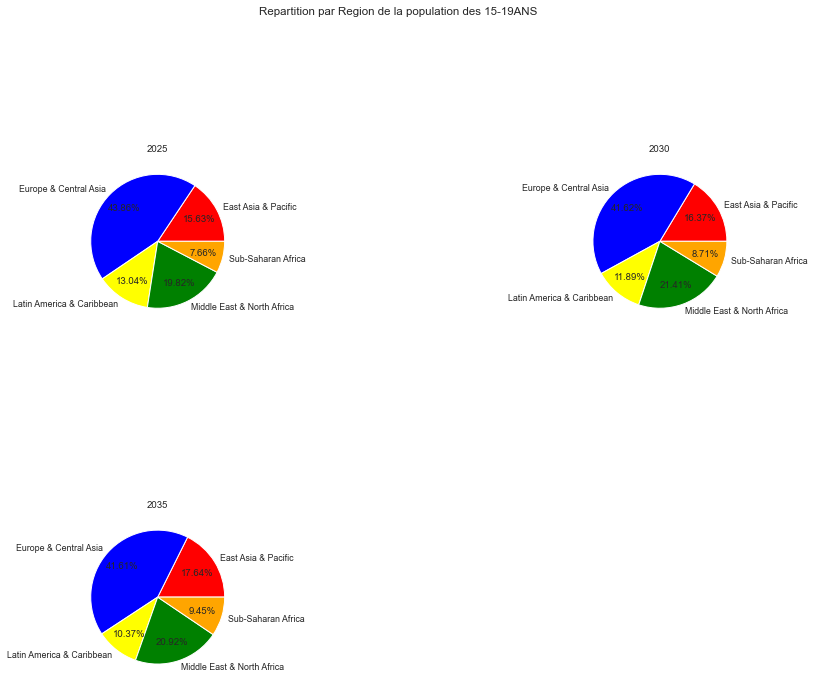

In [57]:
plt.figure(1,figsize=(12,12))
plt.suptitle('Repartition par Region de la population des 15-19ANS')
plt.gcf().subplots_adjust(wspace=2)
plt.subplot(2,2,1)
x2025=mediane['2025'].values
plt.pie(x2025,labels=mediane.index.values,
        autopct=lambda x: str(round(x,2))+'%',pctdistance=0.7,labeldistance=1.1,
        colors=['red','blue','yellow','green','orange'])
plt.title('2025')

plt.subplot(2,2,2)
x2030=mediane['2030'].values
plt.pie(x2030,labels=mediane.index.values,
        autopct=lambda x: str(round(x,2))+'%',pctdistance=0.7,labeldistance=1.1,
       colors=['red','blue','yellow','green','orange'])
plt.title('2030')

plt.subplot(2,2,3)
x2035=mediane['2035'].values
plt.pie(x2035,labels=mediane.index.values,
        autopct=lambda x: str(round(x,2))+'%',pctdistance=0.7,labeldistance=1.1,
       colors=['red','blue','yellow','green','orange'])
plt.title('2035')



Ces graphiques nous montrent l'interet de se focaliser sur la region Europe et Asie Centrale. En supposant que Academy soit en France, cette region est egalement interessante par la proximite geographique donc permettant un deplacement dans ces pays par air, rails et routes. D'autre part une majorite de ces pays utilise l'alphabet latin ce qui simplifie les problèmes de transcription dans la langue officielle du pays.  
Nous allons donc nous focaliser sur cette region.

### Etude de la region Europe et Asie Centrale

Cette région semble la plus appropriéepour une expansion internationale de Academy :
- l'utilisation d'internet est déjà bonne en 2015
- les projections des nombres des 15-19 ans donnent des valeurs satisfaisantes
- la proximite et l'alphabet utilise

Nous noterons EAC cette region en abrégé.

Nous allons rechercher les pays qui semblent les plus interessants 

In [33]:
df_EAC=dfhi_futur[dfhi_futur['Region']=='Europe & Central Asia'].copy()
df_EAC.drop(['Region'], axis=1,inplace=True)
df_EAC.head()

,Indicator Code,2025,2030,2035,Country
21,POP.15-19ANS.NIV2,244.24,244.17,246.75,Austria
22,POP.15-19ANS.NIV4,12.57,13.26,14.06,Austria
23,POP.15-19ANS.NIV3,87.85,92.64,98.18,Austria
39,POP.15-19ANS.NIV2,357.79,349.18,346.55,Belgium
40,POP.15-19ANS.NIV4,8.75,8.98,9.33,Belgium


Calculons le pourcentage d'evolution du nomnbre des 15-19 ans suivant les niveaux entre 2025 et 2035

In [64]:
df_EAC['%.EVOL.15-19ANS']=(df_EAC['2035']/df_EAC['2025']-1)*100
df_EAC.head()

,Indicator Code,2025,2030,2035,Country,%.EVOL.15-19ANS
21,POP.15-19ANS.NIV2,244.24,244.17,246.75,Austria,1.027678
22,POP.15-19ANS.NIV4,12.57,13.26,14.06,Austria,11.853620
23,POP.15-19ANS.NIV3,87.85,92.64,98.18,Austria,11.758680
39,POP.15-19ANS.NIV2,357.79,349.18,346.55,Belgium,-3.141508
40,POP.15-19ANS.NIV4,8.75,8.98,9.33,Belgium,6.628571


Separons suivant les niveaux d'études et classons les pays par la valeur moyenne sur les trois années

Niveau 2

In [72]:
niv2_EAC=df_EAC[df_EAC['Indicator Code']=='POP.15-19ANS.NIV2'][['2025','2030','2035','Country','%.EVOL.15-19ANS']].copy()
niv2_EAC['Moyenne.NIV2']=niv2_EAC[['2025','2030','2035']].mean(axis=1)
niv2_EAC_tri=niv2_EAC.sort_values(by='Moyenne.NIV2',ascending=False)
niv2_EAC_tri.describe()

,2025,2030,2035,%.EVOL.15-19ANS,Moyenne.NIV2
count,28.000000,28.000000,28.00000,28.000000,28.000000
mean,683.791429,666.585714,648.75000,-2.186855,666.375714
std,931.883984,931.997468,882.93528,9.770130,914.077828
min,0.150000,0.160000,0.17000,-20.589577,0.160000
25%,105.462500,102.447500,97.26000,-9.045461,101.723333
50%,289.640000,269.315000,273.10500,-2.667477,277.558333
75%,682.097500,641.490000,629.51500,5.415241,651.034167
max,3477.660000,3604.650000,3154.60000,13.611457,3412.303333


Visualisation des 10 premières lignes

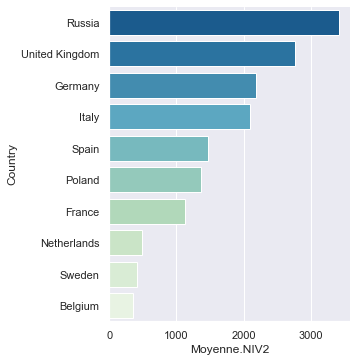

In [79]:
sns.set(font_scale=1)
ax=sns.catplot(x='Moyenne.NIV2',y='Country',data=niv2_EAC_tri.head(10),kind='bar',palette='GnBu_r')


Le classement des pays sur le nombre prevu des 15-19 ans ayant un niveau2, donne la Russie puis la Grande Bretagne, l'Allemagne, italie, Espagne et Pologne. L'inconvenient de la Russie est que ce pays utilise l'alphabet cyrillique. 

Niveau 3

In [36]:
niv3_EAC=df_EAC[df_EAC['Indicator Code']=='POP.15-19ANS.NIV3'][['2025','2030','2035','Country']].copy()
niv3_EAC['Moyenne.NIV3']=niv3_EAC.mean(axis=1)
niv3_EAC_tri=niv3_EAC.sort_values(by='Moyenne.NIV3',ascending=False)
niv3_EAC_tri.describe()

,2025,2030,2035,Moyenne.NIV3
count,28.000000,28.000000,28.000000,28.000000
mean,426.689286,445.178929,441.371071,437.746429
std,908.580023,978.285908,921.203386,935.650514
min,4.320000,4.420000,5.090000,4.610000
25%,38.667500,40.727500,42.832500,40.742500
50%,103.150000,104.925000,110.380000,106.511667
75%,301.700000,290.515000,295.262500,294.583333
max,4457.480000,4837.660000,4443.490000,4579.543333


Visualisation des 10 premières lignes



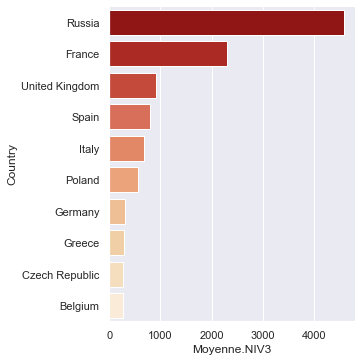

In [37]:
sns.set(font_scale=1)
ax=sns.catplot(x='Moyenne.NIV3',y='Country',data=niv3_EAC_tri.head(10),kind='bar',palette='OrRd_r')

Pour la projection concernant les 15-19 ans ayant le niveau 3, la Russie reste en tête et l'allemagne recule derriere la Pologne.

Niveau 4

In [38]:
niv4_EAC=df_EAC[df_EAC['Indicator Code']=='POP.15-19ANS.NIV4'][['2025','2030','2035','Country']].copy()
niv4_EAC['Moyenne.NIV4']=niv4_EAC.mean(axis=1)
niv4_EAC_tri=niv4_EAC.sort_values(by='Moyenne.NIV4',ascending=False)
niv4_EAC_tri.describe()

,2025,2030,2035,Moyenne.NIV4
count,28.000000,28.000000,28.000000,28.000000
mean,7.198571,7.613571,7.969286,7.593810
std,19.524116,21.051603,22.151428,20.904542
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,1.790000,1.862500,1.925000,1.859167
max,81.210000,89.770000,95.240000,88.740000


Visualisation graphique des 10 premières lignes

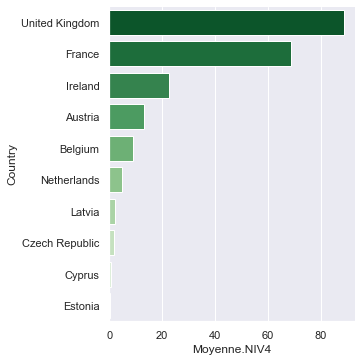

In [39]:
ax=sns.catplot(x='Moyenne.NIV4',y='Country',data=niv4_EAC_tri.head(10),kind='bar',palette='Greens_r')

Nous pouvons remarquer la variation de la moyenne d'age des etudiants ayant le niveau 4 suivant les pays, mais cet indicateur semble moins pertinent que les deux precedants

Afin de pouvoir classer les pays, nous allons attribuer un score suivant le classement

In [80]:
niveau_score=[28-i for i in range(28)]

niv2_EAC_tri['NIV2.SCORE']=niveau_score
niv3_EAC_tri['NIV3.SCORE']=niveau_score
niv4_EAC_tri['NIV4.SCORE']=niveau_score
niv2_EAC_tri.head()


,2025,2030,2035,Country,%.EVOL.15-19ANS,Moyenne.NIV2,NIV2.SCORE
372,3477.66,3604.65,3154.60,Russia,-9.289580,3412.303333,28
474,2643.62,2791.76,2835.94,United Kingdom,7.274873,2757.106667,27
165,2166.35,2151.68,2256.17,Germany,4.146144,2191.400000,26
219,2319.28,2041.11,1933.30,Italy,-16.642234,2097.896667,25
411,1666.28,1423.86,1323.20,Spain,-20.589577,1471.113333,24


Rassemblons les donnees dans un dataframe df_class

In [83]:
df_class=niv2_EAC_tri[['Country','NIV2.SCORE','Moyenne.NIV2','%.EVOL.15-19ANS']].merge(
    niv3_EAC_tri[['Country','NIV3.SCORE','Moyenne.NIV3']],how='outer').merge(
    niv4_EAC_tri[['Country','NIV4.SCORE','Moyenne.NIV4']],how='outer')

df_class.head()

,Country,NIV2.SCORE,Moyenne.NIV2,%.EVOL.15-19ANS,NIV3.SCORE,Moyenne.NIV3,NIV4.SCORE,Moyenne.NIV4
0,Russia,28,3412.303333,-9.289580,28,4579.543333,11,0.00
1,United Kingdom,27,2757.106667,7.274873,26,914.440000,28,88.74
2,Germany,26,2191.400000,4.146144,22,313.953333,8,0.00
3,Italy,25,2097.896667,-16.642234,24,673.833333,4,0.00
4,Spain,24,1471.113333,-20.589577,25,796.673333,14,0.00


Regardons si cela a un sens d'introduire un score sur le pourcentage d'utilisation d'internet en 2015.  
Existe-t-il une différence pour cet indicateur entre les pays a haut revenus de la région Europe et Asie Centrale ?

In [45]:
pays_EAC=df_class['Country'].values
df_EAC_past_net=df_past[((df_past['Country Name'].isin(pays_EAC))&
                         (df_past['Indicator Code']=='%.INTERNET.USER'))][['Country Name','2015']].copy()
df_EAC_past_net.describe()

,2015
count,27.000000
mean,81.685865
std,10.799930
min,58.141735
25%,72.407300
50%,83.940142
75%,89.511006
max,98.200000


Compte-tenu du fait que les informations datent de 2015, on va seulement garder la liste des pays ayant un pourcentage d'utilisation de Internet dans le premier quartile

In [46]:
selection=df_EAC_past_net[df_EAC_past_net['2015']<df_EAC_past_net['2015'].quantile(0.25)]['Country Name']

selection

268920      Croatia
279915       Cyprus
367875       Greece
441175        Italy
510810    Lithuania
661075       Poland
664740     Portugal
Name: Country Name, dtype: object

Pour calculer le score final nous allons utiliser des coefficients entre les trois niveaux

L'utilisateur choisit x le coefficient pour le niveau 2 et y le coefficient pour le niveau 3, le coefficient pour le niveau 4 sera alors 1-x-y.
Le classement est alors effectue et les pays sont classes du meilleur score au moins bon.

Dans l'exemple traite x = 0.7, y = 0.25 et z = 0.05

In [94]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [116]:
x_widget = widgets.FloatSlider(min=0.0, max=1.0, step=0.05)
y_widget = widgets.FloatSlider(min=0.0, max=1., step=0.05)
                      
def update_x_range(*args):
    x_widget.max = 1- y_widget.value
y_widget.observe(update_y_range, 'value')
#y_widget.max=1-x_widget.value
def f(x,y):
    
    df_class['Resultat']=x*df_class['NIV2.SCORE']+y*df_class['NIV3.SCORE']+(1-x-y)*df_class['NIV4.SCORE']
    df_class.sort_values(by='Resultat',ascending=False, inplace=True)
    return df_class[['Country','Moyenne.NIV2','%.EVOL.15-19ANS','Moyenne.NIV3','Moyenne.NIV4']].head(10)

interact(f,x=x_widget, y=y_widget);



interactive(children=(FloatSlider(value=0.0, description='x', max=1.0, step=0.05), FloatSlider(value=0.0, desc…

## Conclusion

D'apres l'etude menee a partir de la base de donnees utilisee, il ressort un classement des pays pour répondre à la demande. 
Ce classement ne tient pas compte ni de l'alphabet utilise dans la langue, ni de la monnaie du pays. Nous ne disposons pas des donnees concernant l'utilisation du e-learning dans l'enseignement.  
Cette etude est un eclairage avec un parti pris de travailler avec des pays "riches" et dans une proximite geographique.

Quelques remarques :
- l'Espagne a l'interet d'avoir une langue parlee dans de nombreux pays d'Amerique latine et du sud, ce qui peut etre interessant dans une volonte d'expansion plus tardive mais une decroissance de la population des 15-19 ANS de niveau 2
- les polonais forment la premiere population etrangere en Grande Bretagne, la pologne peut donc eventuellement devenir plus interessante que l'Allemagne ou l'Italie, même si elle avait un taux d'utilisation d'internet assez faible en 2015.

